In [1]:
# Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [4]:
# Reflect an existing database into a new model
Base = automap_base()

In [5]:
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Starting from the most recent data point in the database

# Calculate the date one year from the last date in data set.
year_from_last_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_from_last_date

datetime.date(2016, 8, 23)

In [11]:
# Perform a query to retrieve the data and precipitation scores
result_prior_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_from_last_date).all()

In [12]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(result_prior_year, columns=['date', 'precipitation'])

In [13]:
# Sort the dataframe by date
precip_df = precip_df.sort_values("date")

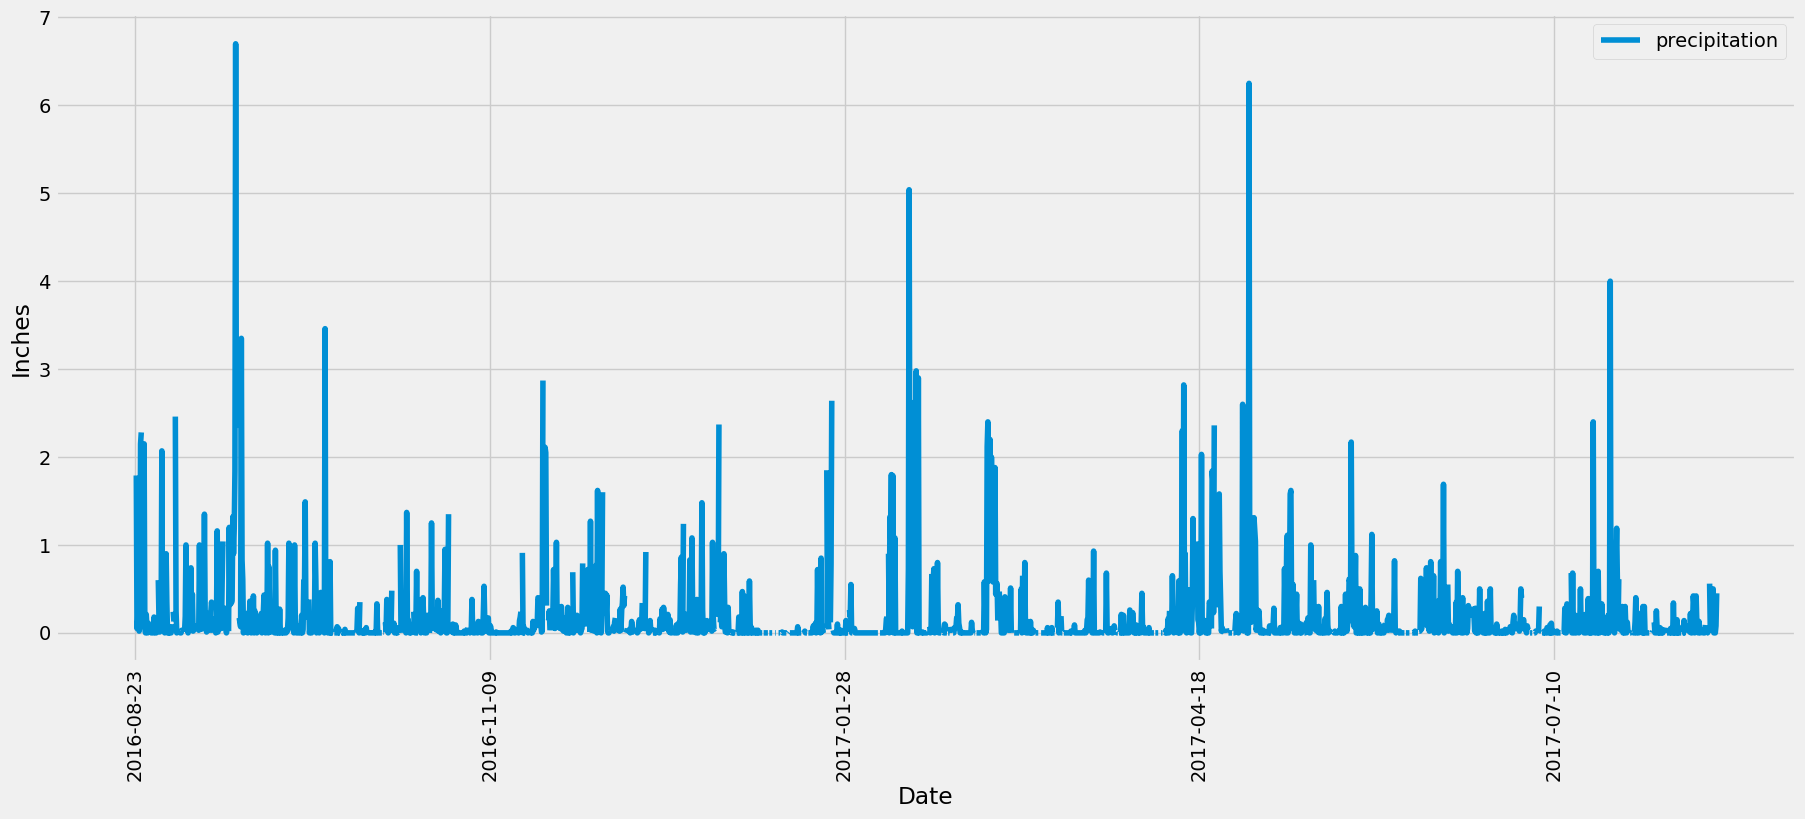

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x = 'date', y = 'precipitation', rot=90, figsize = (20,8))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = precip_df = precip_df.describe()
summary

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_stations = station_counts[0][0]
max_active_stat_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == active_stations).all()
max_active_stat_temps

[(54.0, 85.0, 71.66378066378067)]

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_data = session.query(Measurement.date, Measurement.tobs).\
                filter(Measurement.station == 'USC00519281').\
                filter(func.strftime("%Y-%m-%d", Measurement.date) >= "2016-08-23").\
                group_by(Measurement.date).order_by(Measurement.date).all()

In [20]:
# Create a dataframe that will be used to plot the histogram
last_years_data_df = pd.DataFrame(last_year_data, columns=['Date', 'Temperature'])

In [21]:
# create dataframe that will be used to plot histogram
last_years_data_df = pd.DataFrame(last_year_data, columns=['Date', 'Temperature'])

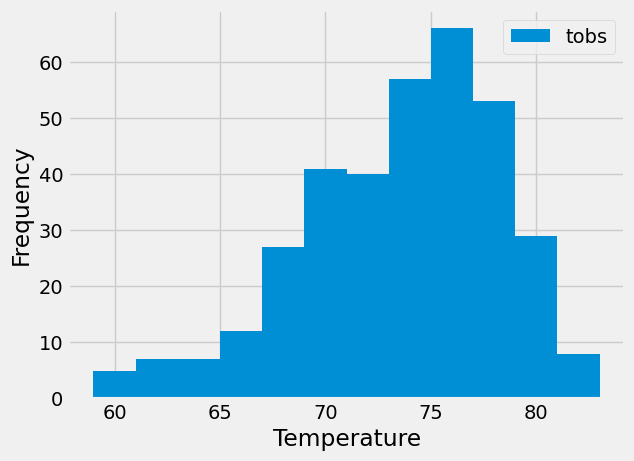

In [22]:
#plot results as a histogram with 12 bins 
plt.hist(last_years_data_df['Temperature'],bins=12,density=False)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])

In [23]:
## Close the session

In [24]:
# Close the session
session.close()